<a href="https://colab.research.google.com/github/xoxonut/DL_2024_Fall/blob/main/DL_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
num_classes = 10
input_shape = (28, 28, 1)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


In [46]:
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3),activation="relu",name='Conv2D_1'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3),activation="relu",name='Conv2D_2'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation="softmax",name='Dense'),
    ]
)
dummy_input = np.zeros((1, 28, 28, 1))
_ = model.predict(dummy_input)
model.summary()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv2D_1 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2D_2 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
class TestLossCallback(tf.keras.callbacks.Callback):
  def __init__(self, test_data):
    super().__init__()
    self.test_data = test_data
    self.batch_size = None
  def on_train_begin(self, logs):
    self.batch_size = self.params.get('batch_size')
  def on_epoch_end(self, epoch, logs):
    _, test_accuracy = self.model.evaluate(
        self.test_data[0],
        self.test_data[1],
        batch_size=self.batch_size,
        verbose=0
        )
    logs['test_accuracy'] = test_accuracy


In [16]:
batch_size = 128
epochs = 5
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.084,
    callbacks = [TestLossCallback((x_test, y_test))]
)


Epoch 1/5
430/430 ━━━━━━━━━━━━━━━━━━━━ 52s 116ms/step - accuracy: 0.7658 - loss: 0.7509 - val_accuracy: 0.9780 - val_loss: 0.0827 - test_accuracy: 0.9725
Epoch 2/5
430/430 ━━━━━━━━━━━━━━━━━━━━ 78s 106ms/step - accuracy: 0.9614 - loss: 0.1278 - val_accuracy: 0.9863 - val_loss: 0.0597 - test_accuracy: 0.9808
Epoch 3/5
430/430 ━━━━━━━━━━━━━━━━━━━━ 82s 107ms/step - accuracy: 0.9740 - loss: 0.0895 - val_accuracy: 0.9871 - val_loss: 0.0511 - test_accuracy: 0.9839
Epoch 4/5
430/430 ━━━━━━━━━━━━━━━━━━━━ 82s 107ms/step - accuracy: 0.9776 - loss: 0.0724 - val_accuracy: 0.9893 - val_loss: 0.0419 - test_accuracy: 0.9870
Epoch 5/5
430/430 ━━━━━━━━━━━━━━━━━━━━ 81s 106ms/step - accuracy: 0.9805 - loss: 0.0615 - val_accuracy: 0.9905 - val_loss: 0.0387 - test_accuracy: 0.9884


In [17]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03501491621136665
Test accuracy: 0.9883999824523926


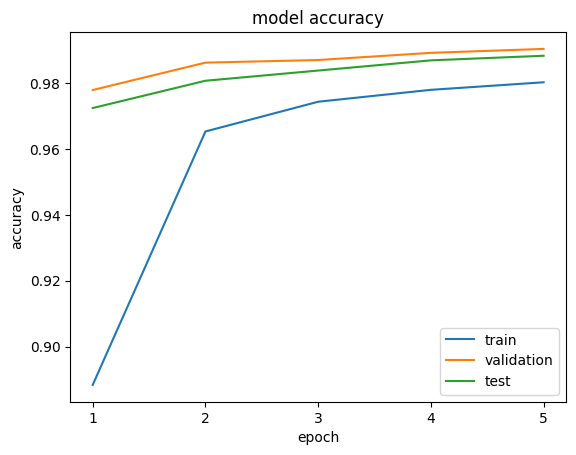

In [18]:
iterate = range(1, epochs+1)
plt.xticks(iterate)
plt.plot(iterate, history.history['accuracy'],)
plt.plot(iterate, history.history['val_accuracy'])
plt.plot(iterate, history.history['test_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation','test'])
plt.show()


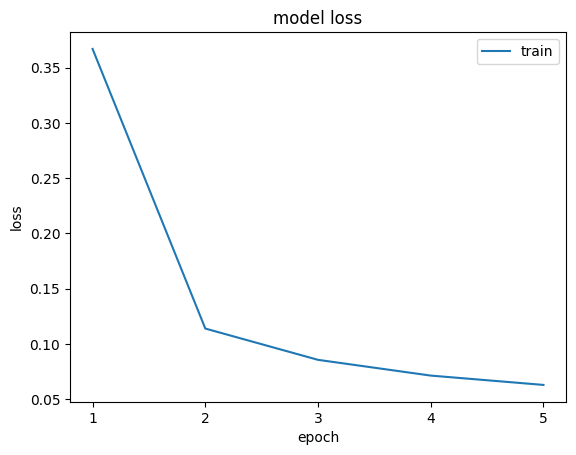

In [19]:
plt.xticks(iterate)
plt.plot(iterate, history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'])
plt.show()


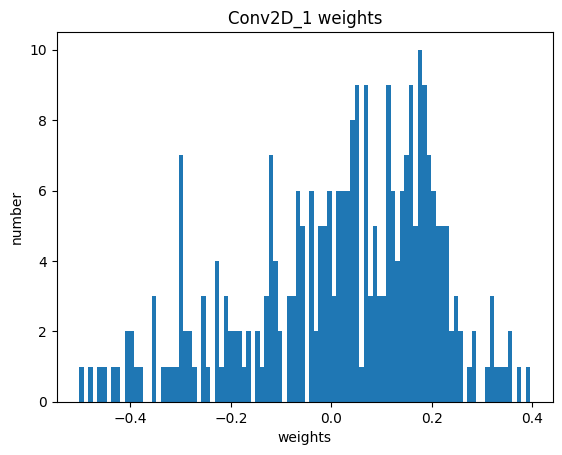

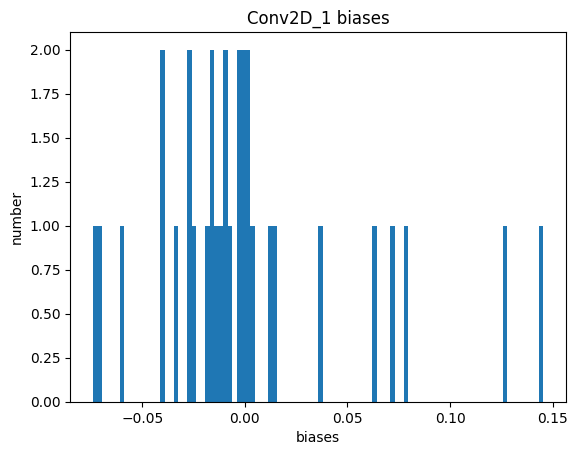

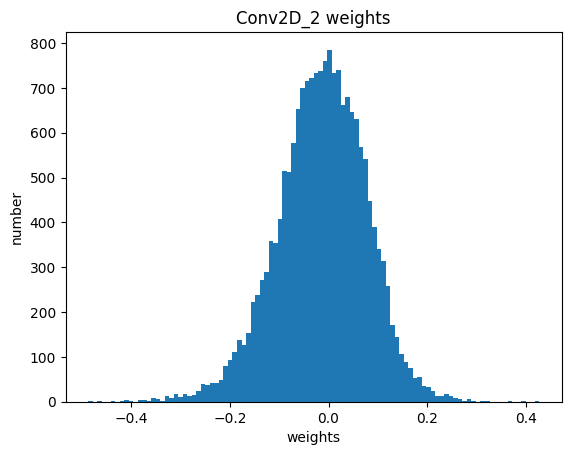

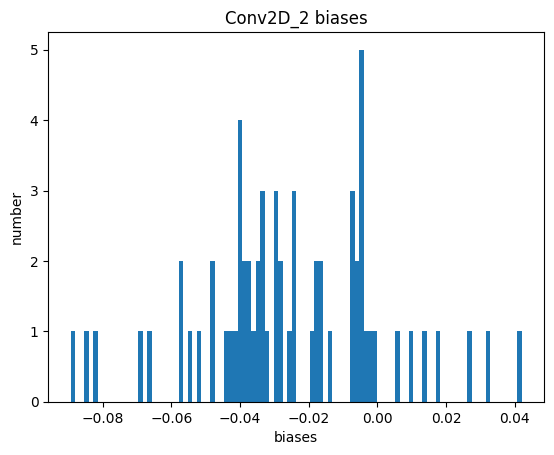

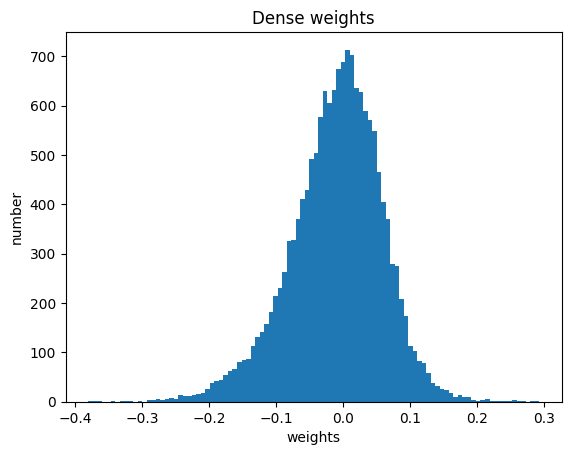

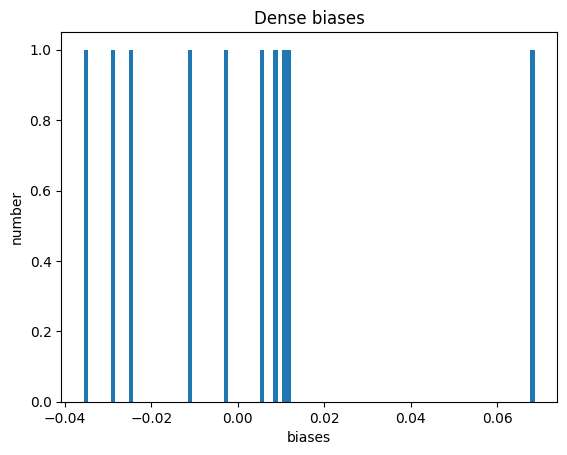

In [20]:
W = model.get_weights()
for layer in model.layers:
    w = layer.get_weights()
    if w:
      plt.hist(w[0].flatten(),bins=100)
      plt.title(f'{layer.name} weights')
      plt.xlabel('weights')
      plt.ylabel('number')
      plt.show()
      plt.hist(w[1].flatten(),bins=100)
      plt.title(f'{layer.name} biases')
      plt.xlabel('biases')
      plt.ylabel('number')
      plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Layer 1 feature map shape: (1, 26, 26, 32)


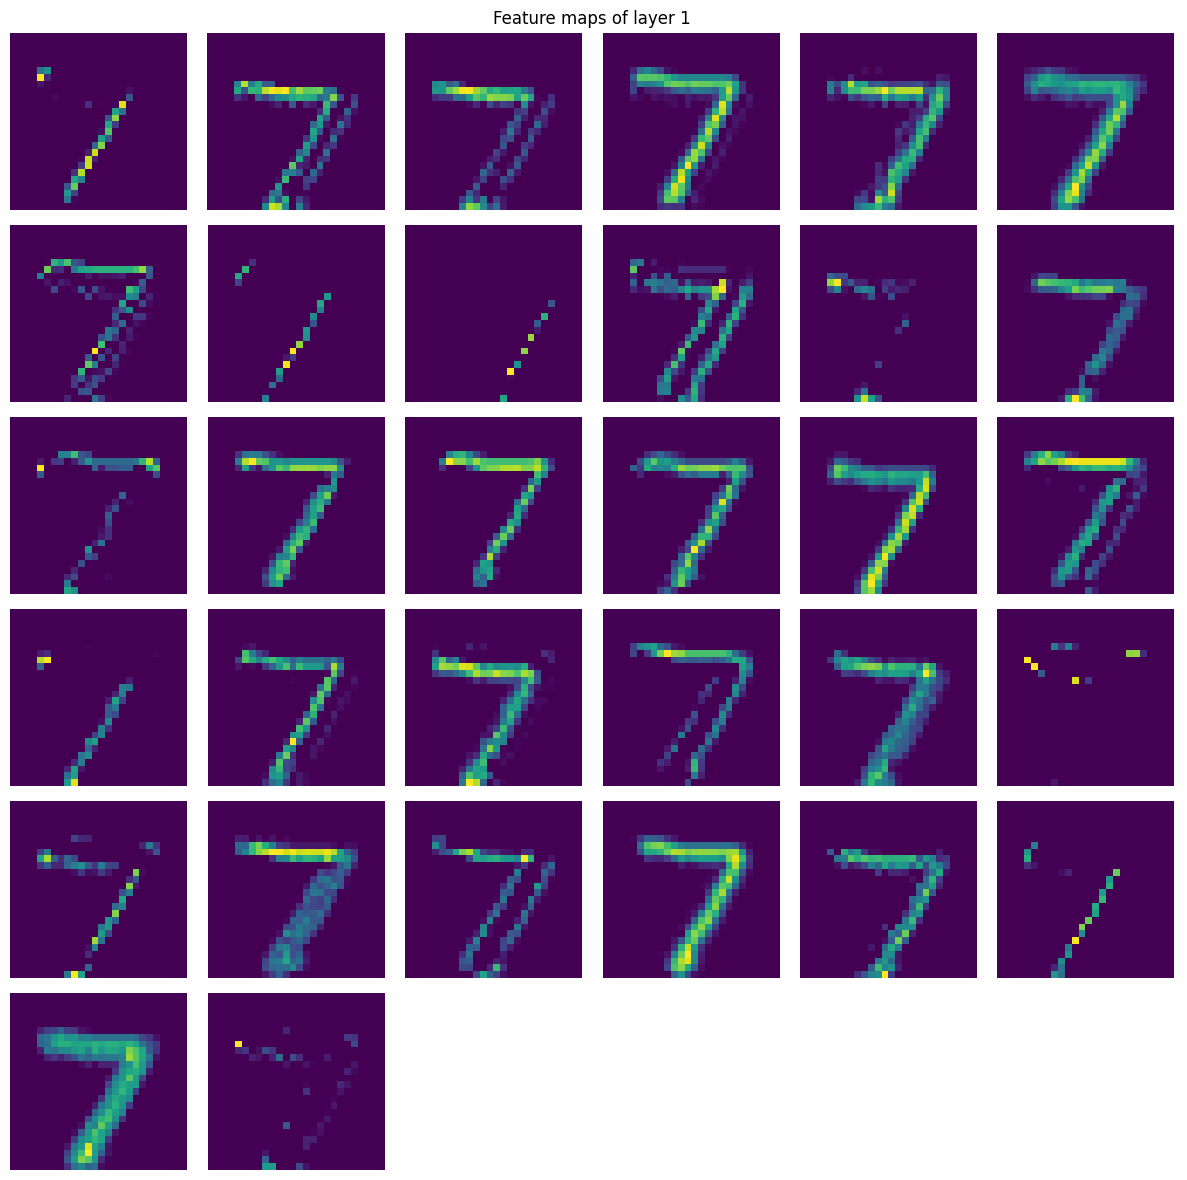

Layer 2 feature map shape: (1, 11, 11, 64)


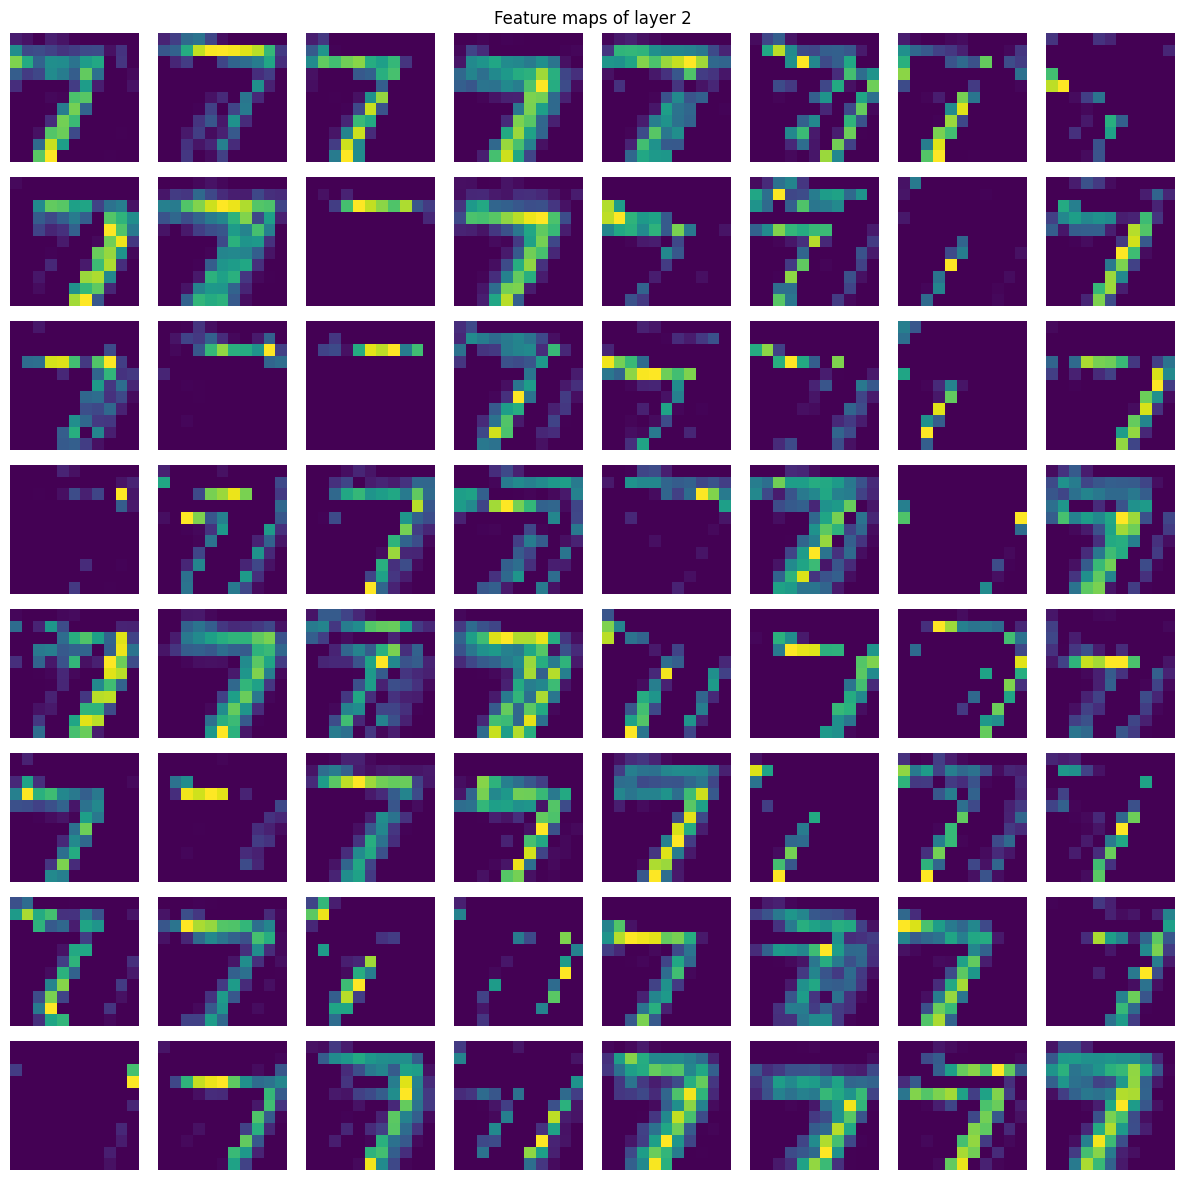

In [54]:
from math import ceil
import matplotlib.pyplot as plt
layer_outputs = [layer.output for layer in model.layers if 'Conv2D' in layer.name]
feature_map_model = tf.keras.Model(inputs=model.inputs, outputs=layer_outputs)
feature_maps = feature_map_model.predict(x_test[0].reshape(1,28,28,1))
print(y_test[0])
for i, feature_map in enumerate(feature_maps):
    num_channels = feature_map.shape[-1]   # 特徵圖的通道數
    size = feature_map.shape[1]           # 特徵圖的尺寸

    print(f"Layer {i+1} feature map shape: {feature_map.shape}")

    # 設置圖像顯示網格，例如 8x8
    grid_size = ceil(num_channels ** 0.5)
    fig, ax = plt.subplots(grid_size, grid_size, figsize=(12, 12))
    fig.suptitle(f'Feature maps of layer {i+1}')

    # 每個通道分別顯示
    for j in range(num_channels):
        row, col = divmod(j, grid_size)
        if row < grid_size and col < grid_size:
            ax[row, col].imshow(feature_map[0, :, :, j], cmap='viridis')
            ax[row, col].axis('off')
    for j in range(num_channels, grid_size**2):
        row, col = divmod(j, grid_size)
        ax[row, col].axis('off')
    plt.tight_layout()
    plt.show()
